/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


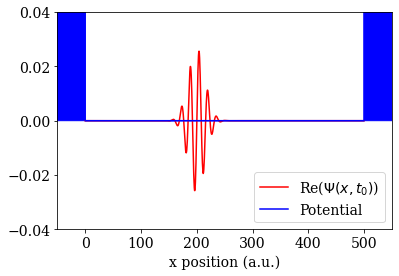

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


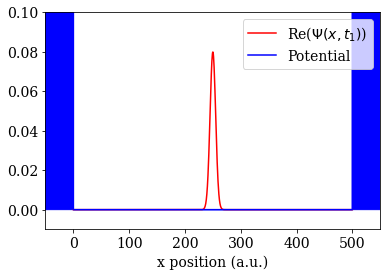

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


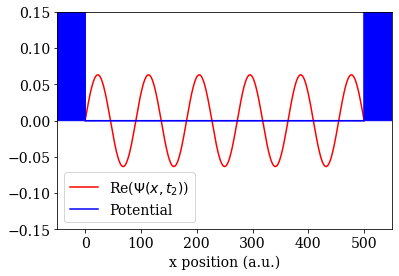

In [1]:
from wpspec import pib
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib import cm
from matplotlib import rcParams


rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

params = {'box_length': 500, 'grid_points': 1000,'system': 'pib', 'time_step': 0.5}

pi = pib(params)

pi.x0 = 200
pi.sigma = 15
pi.k0 = 0.4

#pi.sigma = pi.L / 20
#pi.k0 = 2.0
#pi.dt = 0.5
Vx = [10, 10,  0, 0, 10, 10]
x  = [-100, 0, 0.1, 500, 500.1, 600]
pi.gaussian_wavepacket()

plt.plot(pi.x, pi.Psi, 'red', label='Re($\Psi(x,t_0)$)')
plt.plot(x, Vx, 'blue', label='Potential')
plt.ylim(-0.04, 0.04)
plt.xlim(-50, 550)
plt.xlabel("x position (a.u.)")
#plt.ylabel("Real part of wavefunction")
plt.fill_between(x, Vx, color='blue')

plt.legend()
plt.savefig("T1.eps")
plt.show()


pi.position_eigenfunction(250)
plt.plot(pi.x, pi.Psi, 'red', label='Re($\Psi(x,t_1)$)')
plt.plot(x, Vx, 'blue', label='Potential')
plt.ylim(-0.01, 0.1)
plt.xlim(-50, 550)
plt.xlabel("x position (a.u.)")
plt.legend()
#plt.ylabel("Real part of wavefunction")
plt.fill_between(x, Vx, color='blue')
plt.savefig("T2.eps")
plt.show()

pi.Psi = pi.eigenfunction(11)
plt.plot(pi.x, pi.Psi, 'red', label='Re($\Psi(x,t_2)$)')
plt.plot(x, Vx, 'blue', label='Potential')
plt.ylim(-0.15, 0.15)
plt.xlim(-50, 550)
plt.xlabel("x position (a.u.)")
plt.legend()
#plt.ylabel("Real part of wavefunction")
plt.fill_between(x, Vx, color='blue')
plt.savefig("T3.eps")
plt.show()


In [13]:
pi.V = 0.00005*(pi.x-250)**2
pi.finite_difference_T_matrix()
pi.finite_difference_V_matrix()
pi.finite_difference_H_matrix()

1

(0.004999217062535442+0j)


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


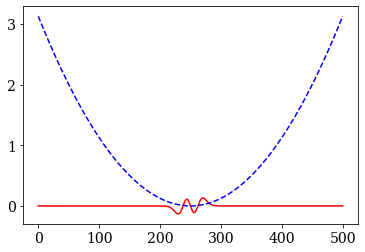

In [16]:
from scipy.sparse.linalg import eigs

vals, vecs = eigs(pi.H_matrix, k=5,  which='SM')
print(vals[0])

plt.plot(pi.x, vecs[:,3], 'red')
plt.plot(pi.x, pi.V, 'b--')
#plt.ylim(0,0.005)
plt.show()